# KMeans

KMeans is a representative-based algorithms. Given a dataset of N instances and a desired number of clusters k, this class of algorithms generates a partition $C$ of $N$ in $k$ clusters ${C1, C2, ..., Ck}$. 
<br>
For each cluster there is a point that summarizes the cluster, it is the mean of the points in the cluster:
$$
\mu_i = \frac{1}{n_i}\sum_{x_j\in C_i}{x_j}
$$
where $n_i = |C_i|$ and $\mu_i$ is the centroid
<br><br>
In particular, KMeans uses a greedy iterative approach to find a clustering that minimizes the SSE objective:
$$
SSE(C) = \sum_{i=1}^{k}{\sum_{x_j\in C_i}{||x_j - \mu_i||^2}}
$$
The goal of the clustering process is thus to find
$$
C^* = \arg\min\limits_{C}{SSE(C)}
$$

## KMeans Algorithm
- $t = 0$
- Randomly initialize $k$ centroids $\mu^t_1, \mu^t_2, ..., \mu^t_k$
- repeat:
    - $t = t + 1$
    - $C_j \leftarrow \{\}$ for all $j = 1,...,k$
    - //cluster assignment step<br>
    for each $x_j \in D$ do:
        - $j^* = \arg\min\limits_{i}{||x_j - \mu_i||^2}$ //assign $x_j$ to closest centroid
        - $C_j^* = C_j^* \cup \{ x_j \}$
    - //centroid update step<br>
    for each $i = 1$ to $k$ do:
        - $\mu^t_i = \frac{1}{|C_i| \sum_{x_j \in C_i}{x_j}}$
- until $\sum_{i = 1}^{k}{||\mu^t_i - \mu^{t-1}_i||^2}$

### Algorithms Illustrations
<div>
<center>
    <img src="images/kmeans/kmeans_1.png" width="200"/>
    <img src="images/kmeans/kmeans_2.png" width="200"/>
    <img src="images/kmeans/kmeans_3.png" width="200"/>
    <img src="images/kmeans/kmeans_4.png" width="200"/>
    <img src="images/kmeans/kmeans_5.png" width="200"/>
    <img src="images/kmeans/kmeans_6.png" width="200"/>
    <img src="images/kmeans/kmeans_7.png" width="200"/>
</center>
</div>

### Notes:
- Assumes an Euclidean space but sometimes it can be extended to the non-Euclidean case
- Employs a greedy iterative approaches that minimizes the SSE objective. Accordingly it can converge to a local optimal instead of a globally optimal clustering.

## Time Complexity
- The total time time for KMeans is given as $O(tnkd)$, which is a linear time complexity, where:
    - t: number of iterations
    - n: number of points
    - k: number of clusters
    - d: number of data dimension


## Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from scipy.spatial.distance import cdist, pdist

import matplotlib
%matplotlib inline

# color palette 
color_palette1 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[0],plt.cm.Paired.colors[2],plt.cm.Paired.colors[4]], name='DecisionSurfaceColorMap')
color_palette2 = matplotlib.colors.ListedColormap([plt.cm.Paired.colors[1],plt.cm.Paired.colors[3],plt.cm.Paired.colors[5]], name='DataPointsColorMap')

In [2]:
# Create artificial dataset, they are three blobs to analyze

random_state = 1234 ## another interesting example can be generated using the seed 36
no_clusters = 3
no_samples = 1500

x, y = make_blobs(centers=no_clusters, n_samples=no_samples, random_state=random_state)

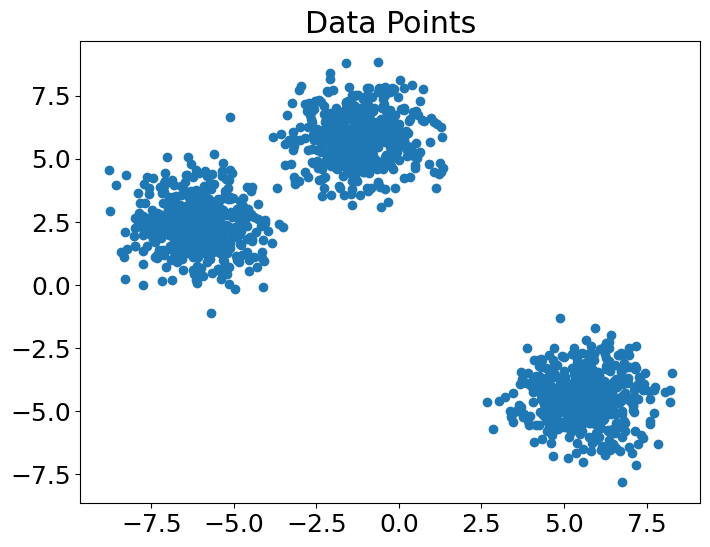

In [3]:
# Let's plot them

plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(x[:,0],x[:,1], cmap=color_palette1);
plt.title("Data Points");

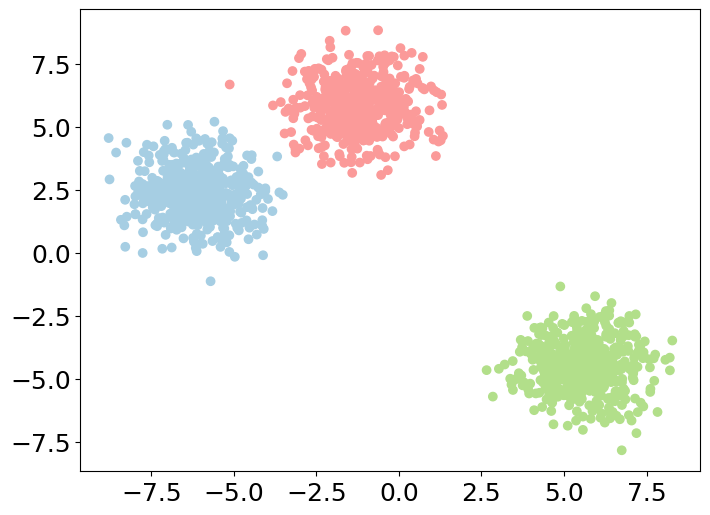

In [4]:
# apply k-means with the correct number of clusters (k=3)

yp = KMeans(n_clusters=3).fit_predict(x)
plt.figure(figsize=(8, 6));
font = {'family' : 'sans', 'size'   : 18}
plt.rc('font', **font)
plt.scatter(x[:,0],x[:,1],c=yp,cmap=color_palette1);

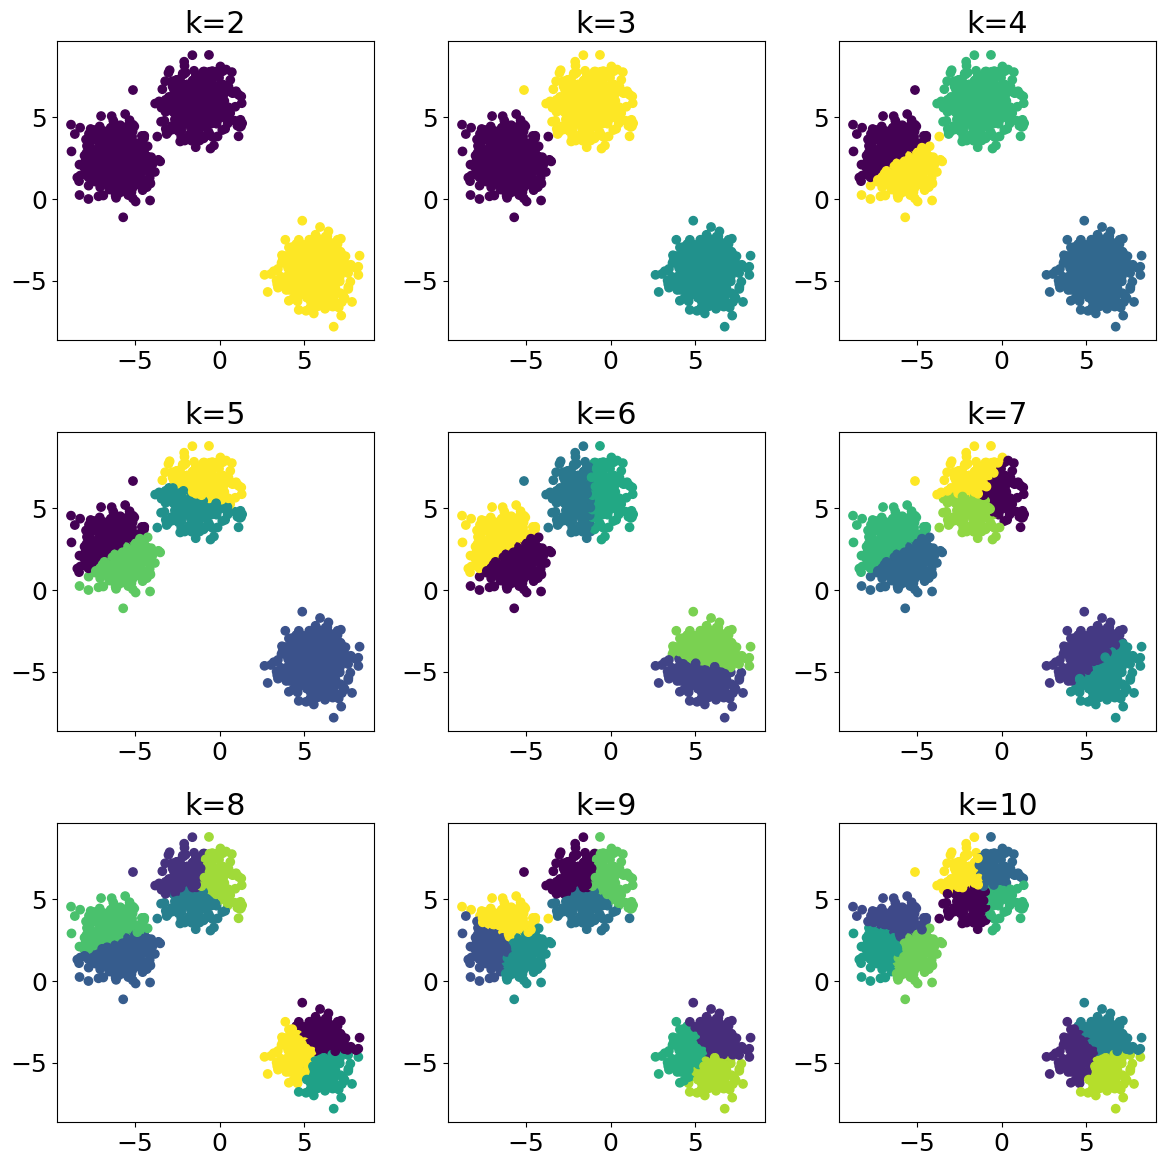

In [6]:
# apply k-means with different values of k and plot the result.

plt.figure(figsize=(12, 12));

for i in range(9):
    yp = KMeans(n_clusters=(i+2)).fit_predict(x)
    plt.subplot(330+(i+1))
    plt.title('k='+str(i+2))
    plt.scatter(x[:, 0], x[:, 1], c=yp,cmap=plt.get_cmap())
    
plt.tight_layout()

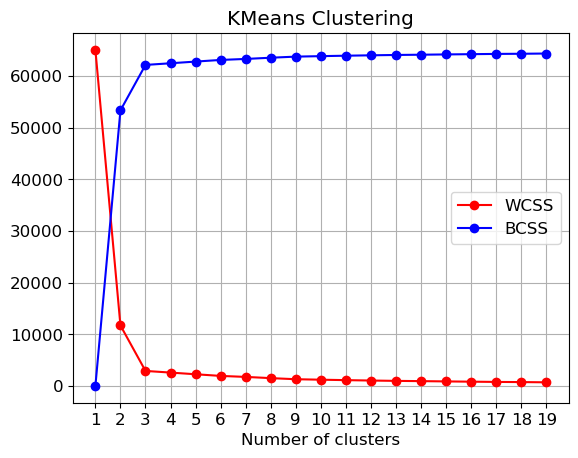

In [9]:
# Knee/Elbow Analysis

def KneeElbowAnalysis(x,max_k=20):
    k_values = range(1,max_k)
    clusterings = [KMeans(n_clusters=k, random_state=random_state).fit(x) for k in k_values]
    centroids = [clustering.cluster_centers_ for clustering in clusterings]

    D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
    cIdx = [np.argmin(D,axis=1) for D in D_k]
    dist = [np.min(D,axis=1) for D in D_k]
    avgWithinSS = [sum(d)/x.shape[0] for d in dist]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]

    tss = sum(pdist(x)**2)/x.shape[0]
    bss = tss-wcss

    kIdx = 10-1
    
    #
    # elbow curve
    #
    fig = plt.figure()
    font = {'family' : 'sans', 'size'   : 12}
    plt.rc('font', **font)
    plt.xticks(k_values)
    plt.plot(k_values, wcss, 'o-', color='red', label='WCSS')
    plt.plot(k_values, bss, 'o-', color='blue', label='BCSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.legend()
    plt.title('KMeans Clustering');

KneeElbowAnalysis(x)